In [1]:
#test if the shit works
import GetOldTweets3 as got
import pandas as pd
import numpy as np

In [2]:
def scrape_tweets (username, start_date, top_tweets):
    tweetCriteria = got.manager.TweetCriteria().setUsername(username)\
                                            .setTopTweets(top_tweets)\
                                            .setSince(start_date)
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)

    user_tweets = [[tweet.text, tweet.date, tweet.favorites, tweet.retweets, tweet.hashtags] for tweet in tweets]
    tweet_df = pd.DataFrame(user_tweets, columns=["text", "date", "favorites", "retweets", "hashtags"])
    return tweet_df

In [3]:
%%time
tweet_df = scrape_tweets("Treysessy", "2018-01-01", True)

Wall time: 2min 45s


In [4]:
tweet_df.shape

(988, 5)

In [5]:
favorites = tweet_df[tweet_df.favorites >= 5]

In [6]:
tweet_df.iloc[832].text

'solid i havent started on anything im gonna die'

In [7]:
tweet_df[tweet_df.date <= "2019-06-01"].sample(10).text

890                           ps4 how much i've missed u
454    The goal is to get through the semester withou...
965      Fuck school hasnt started but im tapping out na
720    Ride your mom to stop biblical angels in the f...
678                          Im 13 and i hate my parents
401    the truth is i'm just overrated and open my mo...
554    some questions you just cant find an answer to...
715    My mom and sister turned the hedgehog into a m...
388    after i finished ranting to my sister about ho...
390    i make depressing tweets at 3 am because i wan...
Name: text, dtype: object

In [8]:
favorites.shape

(434, 5)

In [9]:
#126, 
tweet_df.favorites.describe()

count    988.000000
mean       6.683198
std       19.571288
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      581.000000
Name: favorites, dtype: float64

In [10]:
tweet_df

,text,date,favorites,retweets,hashtags
0,mobius strips are overrated theyre just bracel...,2020-08-03 04:07:12+00:00,5,1,
1,when is the next long weekend,2020-08-03 02:50:52+00:00,10,0,
2,just realized that parasite's ramdon is a case...,2020-07-30 04:16:08+00:00,6,1,
3,We are actually fucked lmao,2020-07-30 03:55:00+00:00,6,1,
4,To this day i still have no idea when i should...,2020-07-30 03:48:42+00:00,2,0,
...,...,...,...,...,...
983,Applies to the advice i give as well,2018-01-01 12:54:14+00:00,0,0,
984,Jan 5-6 ah,2018-01-01 12:24:09+00:00,3,0,
985,What was your favorite anime of 2017 and why i...,2018-01-01 05:38:32+00:00,0,0,
986,M R . W O R L D W I D E,2018-01-01 03:32:46+00:00,0,0,


In [11]:
tweet_df[tweet_df.favorites == 10].sample(10)

,text,date,favorites,retweets,hashtags
310,my sister dyed her hair blue and she looks lik...,2019-05-31 10:51:05+00:00,10,0,
245,The best thing abt jet lag is getting 3 am exi...,2019-07-04 20:32:13+00:00,10,1,
272,Farenheit 451 is a book that reminds u that ur...,2019-06-20 12:22:38+00:00,10,1,
792,Killmonger > Thanos pa rin,2018-04-29 11:46:17+00:00,10,1,
951,I WAS OUTSIDE STARBUCKS WHEN I SAW THE P2P OTW...,2018-01-23 09:14:45+00:00,10,0,
851,i'm back from my exile my life actually got 10...,2018-03-31 17:59:24+00:00,10,1,
612,back in 2016 i was confident that duterte woul...,2018-09-10 13:32:50+00:00,10,0,
569,"Friend: ""Which talab talks are you enlisting i...",2018-10-02 12:23:28+00:00,10,0,
496,My stuff didnt get stolen,2018-12-09 10:40:43+00:00,10,1,
948,all i wanted was for people to comment on the ...,2018-01-24 14:31:20+00:00,10,0,


In [12]:
tweet_df[tweet_df.favorites >= 3].shape

(659, 5)

In [13]:
tweet_df[tweet_df.retweets >= 1].shape

(288, 5)

In [18]:
tweet_df.shape

(988, 5)

In [16]:
tweet_df.to_csv("dataset.csv")

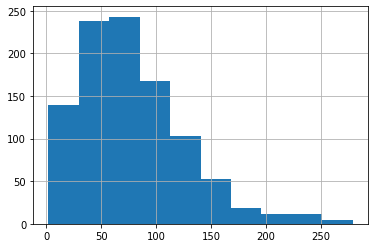

In [17]:
data = pd.read_csv("dataset.csv")
data.text.str.len().hist()